In [4]:
#from experiment_logger import ExperimentLogger

In [5]:
# Biliotecas

# Tratamento dos dados
import pandas as pd
import numpy as np
pd.set_option("display.max_colwidth", None)

# Configurando o pandas para mostrar todas as colunas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
# !pip install pandas matplotlib seaborn
# !pip install lifelines # regress√£o cox
# !pip install neurokit2
#!pip install jinja2
#pip install tensorflow keras lifelines

# !pip install pycox           # pycox (baseado em PyTorch)
# !pip install scikit-survival # scikit-survival (integra com scikit-learn)

# ! pip install sklearn-pandas #Uncomment to install `sklearn-pandas`


#!pip uninstall scipy
#!pip install scipy==1.13.1  # esta vers√£o est√°vel e compat√≠vel com pycoxe e compativel com o python3.12 e tambem √© a ultima que utiliza a fun√ß√£o simps que sera substituida por outra vers√£o simpson que vai ser removida na vers√£o 1.14.0
#!pip install torchtuples


!pip list

In [7]:
# from google.colab import drive

# drive.mount('/content/drive')

In [8]:
# from google.colab import drive

# drive.mount('/content/drive')
# link_definicao = '/content/drive/MyDrive/UFC_mestrado/Sigaa_UFC/Tese_dissertativo_Mestrado/Projeto_Tese_mestrado/02_Dataset/subject-info_definitions.csv'
# link_codes = '/content/drive/MyDrive/UFC_mestrado/Sigaa_UFC/Tese_dissertativo_Mestrado/Projeto_Tese_mestrado/02_Dataset/subject-info_codes.csv'

In [9]:
link_codes = r'D:\Projeto_Tese_mestrado\02_Dataset\dados_csv_info_definitions\subject-info_codes.csv'
link_definicao = r'D:\Projeto_Tese_mestrado\02_Dataset\dados_csv_info_definitions\subject-info_definitions.csv'
link_csv = r'D:\Projeto_Tese_mestrado\02_Dataset\dados_csv_info_definitions\ubject-info_limpo.csv'

In [10]:
df_def = pd.read_csv(link_definicao, delimiter=';')
df_cod = pd.read_csv(link_codes, delimiter=';',encoding = 'latin')
df = pd.read_csv(link_csv)

In [11]:
df.head()

Patient ID  Follow-up period from enrollment (days)  days_4years  \
0      P0001                                     2065         1460   
1      P0002                                     2045         1460   
2      P0003                                     2044         1460   
3      P0004                                     2044         1460   
4      P0005                                     2043         1460   

   Exit of the study  Cause of death  SCD_4years SinusRhythm  \
0                0.0               0                       0   
1                0.0               0                       0   
2                0.0               0                       0   
3                0.0               0                       0   
4                0.0               0                       0   

   HF_4years SinusRhythm  Age  Gender (male=1)  Weight (kg)  Height (cm)  \
0                      0   58                1           83          163   
1                      0   58                1           74          160   
2                      0   69                1           83          174   
3                      0   56                0           84          165   
4                      0   70                1           97          183   

   Body Mass Index (Kg/m2)  NYHA class  Diastolic blood  pressure (mmHg)  \
0                     31.2           3                                75   
1                     28.9           2                                80   
2                     27.4           2                                75   
3                     30.9           2                                75   
4                     29.0           2                                85   

   Systolic blood pressure (mmHg)  HF etiology - Diagnosis  Diabetes (yes=1)  \
0                             110                        1                 0   
1                             130                        2                 0   
2                             100                        1                 0   
3                             155                        8                 1   
4                             125                        2                 1   

   History of dyslipemia (yes=1)  Peripheral vascular disease (yes=1)  \
0                              0                                    0   
1                              1                                    0   
2                              0                                    0   
3                              1                                    0   
4                              1                                    0   

   History of hypertension (yes=1)  Prior Myocardial Infarction (yes=1)  \
0                                0                                    0   
1                                0                                    1   
2                                0                                    0   
3                                1                                    0   
4                                1                                    1   

   Prior implantable device  Prior Revascularization  Syncope  \
0                         0                        0        0   
1                         0                        1        0   
2                         0                        0        0   
3                         0                        0        0   
4                         3                        2        0   

   daily smoking (cigarretes/day)  smoke-free time (years)  cigarettes /year  \
0                              20                       20            160600   
1                              20                        1            292000   
2                              15                        9            246375   
3                               0                        0                 0   
4                              30                        9            525600   

   alcohol consumption (standard units)

In [12]:
print(f'Quantidade de colunas: {df.shape[1]}')
print(f'Quantidade de linhas: {df.shape[0]}')

Quantidade de colunas: 105
Quantidade de linhas: 992


In [13]:
df.head()

Patient ID  Follow-up period from enrollment (days)  days_4years  \
0      P0001                                     2065         1460   
1      P0002                                     2045         1460   
2      P0003                                     2044         1460   
3      P0004                                     2044         1460   
4      P0005                                     2043         1460   

   Exit of the study  Cause of death  SCD_4years SinusRhythm  \
0                0.0               0                       0   
1                0.0               0                       0   
2                0.0               0                       0   
3                0.0               0                       0   
4                0.0               0                       0   

   HF_4years SinusRhythm  Age  Gender (male=1)  Weight (kg)  Height (cm)  \
0                      0   58                1           83          163   
1                      0   58                1           74          160   
2                      0   69                1           83          174   
3                      0   56                0           84          165   
4                      0   70                1           97          183   

   Body Mass Index (Kg/m2)  NYHA class  Diastolic blood  pressure (mmHg)  \
0                     31.2           3                                75   
1                     28.9           2                                80   
2                     27.4           2                                75   
3                     30.9           2                                75   
4                     29.0           2                                85   

   Systolic blood pressure (mmHg)  HF etiology - Diagnosis  Diabetes (yes=1)  \
0                             110                        1                 0   
1                             130                        2                 0   
2                             100                        1                 0   
3                             155                        8                 1   
4                             125                        2                 1   

   History of dyslipemia (yes=1)  Peripheral vascular disease (yes=1)  \
0                              0                                    0   
1                              1                                    0   
2                              0                                    0   
3                              1                                    0   
4                              1                                    0   

   History of hypertension (yes=1)  Prior Myocardial Infarction (yes=1)  \
0                                0                                    0   
1                                0                                    1   
2                                0                                    0   
3                                1                                    0   
4                                1                                    1   

   Prior implantable device  Prior Revascularization  Syncope  \
0                         0                        0        0   
1                         0                        1        0   
2                         0                        0        0   
3                         0                        0        0   
4                         3                        2        0   

   daily smoking (cigarretes/day)  smoke-free time (years)  cigarettes /year  \
0                              20                       20            160600   
1                              20                        1            292000   
2                              15                        9            246375   
3                               0                        0                 0   
4                              30                        9            525600   

   alcohol consumption (standard units)

In [14]:
# dados = pd.DataFrame(df.loc[:,df.columns[0]:'Nitrovasodilator (yes=1)'])
#dados = df.loc[:,df.columns[0]:'Nitrovasodilator (yes=1)']
dados = df.copy()
dados.head()

Patient ID  Follow-up period from enrollment (days)  days_4years  \
0      P0001                                     2065         1460   
1      P0002                                     2045         1460   
2      P0003                                     2044         1460   
3      P0004                                     2044         1460   
4      P0005                                     2043         1460   

   Exit of the study  Cause of death  SCD_4years SinusRhythm  \
0                0.0               0                       0   
1                0.0               0                       0   
2                0.0               0                       0   
3                0.0               0                       0   
4                0.0               0                       0   

   HF_4years SinusRhythm  Age  Gender (male=1)  Weight (kg)  Height (cm)  \
0                      0   58                1           83          163   
1                      0   58                1           74          160   
2                      0   69                1           83          174   
3                      0   56                0           84          165   
4                      0   70                1           97          183   

   Body Mass Index (Kg/m2)  NYHA class  Diastolic blood  pressure (mmHg)  \
0                     31.2           3                                75   
1                     28.9           2                                80   
2                     27.4           2                                75   
3                     30.9           2                                75   
4                     29.0           2                                85   

   Systolic blood pressure (mmHg)  HF etiology - Diagnosis  Diabetes (yes=1)  \
0                             110                        1                 0   
1                             130                        2                 0   
2                             100                        1                 0   
3                             155                        8                 1   
4                             125                        2                 1   

   History of dyslipemia (yes=1)  Peripheral vascular disease (yes=1)  \
0                              0                                    0   
1                              1                                    0   
2                              0                                    0   
3                              1                                    0   
4                              1                                    0   

   History of hypertension (yes=1)  Prior Myocardial Infarction (yes=1)  \
0                                0                                    0   
1                                0                                    1   
2                                0                                    0   
3                                1                                    0   
4                                1                                    1   

   Prior implantable device  Prior Revascularization  Syncope  \
0                         0                        0        0   
1                         0                        1        0   
2                         0                        0        0   
3                         0                        0        0   
4                         3                        2        0   

   daily smoking (cigarretes/day)  smoke-free time (years)  cigarettes /year  \
0                              20                       20            160600   
1                              20                        1            292000   
2                              15                        9            246375   
3                               0                        0                 0   
4                              30                        9            525600   

   alcohol consumption (standard units)

In [15]:

print(f'Quantidade de colunas: {dados.shape[1]}')
print(f'Quantidade de linhas: {dados.shape[0]}')

Quantidade de colunas: 105
Quantidade de linhas: 992


In [16]:
dados.iloc[:,2].describe()

count     992.000000
mean     1212.561492
std       439.881734
min        33.000000
25%      1082.250000
50%      1460.000000
75%      1460.000000
max      1460.000000
Name: days_4years, dtype: float64

In [17]:
dados[['Patient ID','Follow-up period from enrollment (days)','days_4years','Exit of the study','Cause of death']].head()

Patient ID  Follow-up period from enrollment (days)  days_4years  \
0      P0001                                     2065         1460   
1      P0002                                     2045         1460   
2      P0003                                     2044         1460   
3      P0004                                     2044         1460   
4      P0005                                     2043         1460   

   Exit of the study  Cause of death  
0                0.0               0  
1                0.0               0  
2                0.0               0  
3                0.0               0  
4                0.0               0

In [18]:
pd.unique(dados['Exit of the study'])

array([0., 3., 1., 2.])

# **Painel e Relat√≥rio**

In [19]:
# Colunas

# Identifica√ß√£o e Acompanhamento
identificacao_acompanhamento = [
    'Patient ID',
    'Follow-up period from enrollment (days)',
    'days_4years',
    'Exit of the study',
    'Cause of death'
]

# Eventos e Condi√ß√µes Cardiovasculares
eventos_condicoes_cardiovasculares = [
    'SCD_4years SinusRhythm',
    'HF_4years SinusRhythm',
    'Number of ventricular premature contractions per hour',
    'Non-sustained ventricular tachycardia (CH>10)',
    'Number of supraventricular premature beats in 24h',
    'Paroxysmal supraventricular tachyarrhythmia'
]

# Dados Demogr√°ficos e Cl√≠nicos
dados_demograficos_clinicos = [
    'Age',
    'Gender (male=1)',
    'Weight (kg)',
    'Height (cm)',
    'Body Mass Index (Kg/m2)',
    'NYHA class'
]

# Sinais Vitais e Diagn√≥sticos
sinais_vitais_diagnosticos = [
    'Systolic blood pressure (mmHg)',
    'HF etiology - Diagnosis'
]

# Comorbidades e Hist√≥ricos M√©dicos
comorbidades_historicos = [
    'Diabetes (yes=1)',
    'History of dyslipemia (yes=1)',
    'Peripheral vascular disease (yes=1)',
    'History of hypertension (yes=1)',
    'Prior Myocardial Infarction (yes=1)',
    'Prior implantable device',
    'Prior Revascularization',
    'Syncope'
]

# H√°bitos e Consumos
habitos_consumos = [
    'daily smoking (cigarretes/day)',
    'smoke-free time (years)',
    'cigarettes /year',
    'alcohol consumption (standard units)'
]

# Exames Laboratoriais
exames_laboratoriais = [
    'Albumin (g/L)',
    'ALT or GPT (IU/L)',
    'AST or GOT (IU/L)',
    'Normalized Troponin',
    'Total Cholesterol (mmol/L)',
    'Creatinine (?mol/L)',
    'Gamma-glutamil transpeptidase (IU/L)',
    'Glucose (mmol/L)',
    'Hemoglobin (g/L)',
    'HDL (mmol/L)',
    'Potassium (mEq/L)',
    'LDL (mmol/L)',
    'Sodium (mEq/L)',
    'Pro-BNP (ng/L)',
    'Protein (g/L)',
    'T3 (pg/dL)',
    'T4 (ng/L)',
    'Troponin (ng/mL)',
    'TSH (mIU/L)',
    'Urea (mg/dL)'
]

# Exames de Imagem e Medidas Card√≠acas
exames_imagem_medidas = [
    'Signs of pulmonary venous hypertension (yes=1)',
    'Cardiothoracic ratio',
    'Left atrial size (mm)',
    'Right ventricle contractility (altered=1)',
    'Right ventricle end-diastolic diameter (mm)',
    'LVEF (%)',
    'Mitral valve insufficiency ',
    'Mitral flow pattern',
    'Left ventricular posterior wall thickness (mm)',
    'Septal thickness (mm)',
    'Left ventricle end-diastolic diameter (mm)',
    'Left ventricle end-systolic diameter (mm)'
]

# Eletrocardiogramas e Holter
eletrocardiogramas_holter = [
    'Hig-resolution ECG available',
    'ECG rhythm ',
    'Q-waves (necrosis. yes=1)',
    'PR interval (ms)',
    'QRS duration (ms)',
    'QRS > 120 ms ',
    'QT interval (ms)',
    'QT corrected ',
    'Average RR (ms)',
    'Left ventricular hypertrophy (yes=1)',
    'Intraventricular conduction disorder'
]

# Holter
holter = [
    'Holter available',
    'Holter onset (hh:mm:ss)',
    'Holter  rhythm ',
    'minimum RR (ms) ',
    'Average RR (ms)',
    'maximum RR (ms)',
    'RR range (ms)',
    'Number of ventricular premature beats in 24h',
    'Extrasystole couplets ',
    'Ventricular Extrasystole',
    'Non-sustained ventricular tachycardia (CH>10)',
    'Longest RR pause (ms)',
    'Bradycardia',
    'SDNN (ms)',
    'SDANN (ms)',
    'RMSSD (ms)',
    'pNN50 (%)'
]

# Press√£o Arterial
pressao_arterial = [
    'Systolic blood pressure (mmHg)',
    'Diastolic blood  pressure (mmHg)'
]

# Medicamentos
medicamentos = [
    'Calcium channel blocker (yes=1)',
    'Diabetes medication (yes=1)',
    'Amiodarone (yes=1)',
    'Angiotensin-II receptor blocker (yes=1)',
    'Anticoagulants/antitrombotics  (yes=1)',
    'Betablockers (yes=1)',
    'Digoxin (yes=1)',
    'Loop diuretics (yes=1)',
    'Spironolactone (yes=1)',
    'Statins (yes=1)',
    'Hidralazina (yes=1)',
    'ACE inhibitor (yes=1)',
    'Nitrovasodilator (yes=1)'
]


titles = ['Identifica√ß√£o e Acompanhamento',
           'Eventos e Condi√ß√µes Cardiovasculares',
          'Dados Demogr√°ficos e Cl√≠nicos',
          'Sinais Vitais e Diagn√≥sticos',
          'Comorbidades e Hist√≥ricos M√©dicos',
          'H√°bitos e Consumos',
          'Exames Laboratoriais',
          'Exames de Imagem e Medidas Card√≠acas',
          'Eletrocardiogramas e Holter',
          'Holter',
          'Press√£o Arterial',
          'Medicamentos']

colunas = [identificacao_acompanhamento,
           eventos_condicoes_cardiovasculares,
           dados_demograficos_clinicos,
           sinais_vitais_diagnosticos,
           comorbidades_historicos,
           habitos_consumos,
           exames_laboratoriais,
           exames_imagem_medidas,
           eletrocardiogramas_holter,
           holter,
           pressao_arterial,
           medicamentos,
           ]

nomes = ['identificacao_acompanhamento',
           'eventos_condicoes_cardiovasculares',
           'dados_demograficos_clinicos',
           'sinais_vitais_diagnosticos',
           'comorbidades_historicos',
           'habitos_consumos',
           'exames_laboratoriais',
           'exames_imagem_medidas',
           'eletrocardiogramas_holter',
           'holter',
           'pressao_arterial',
           'medicamentos',
           ]

# **Limpeza e Tratamento dos Dados**

In [20]:
# subsituindo vazio por zero

dados = dados.iloc[:,1:]
dados = dados.fillna(0)
dados['Holter onset (hh:mm:ss)'] = dados['Holter onset (hh:mm:ss)'] # colocando a coluna de horas no formato original deixando com os vazios em vez de zero

In [21]:
dados.head()

Follow-up period from enrollment (days)  days_4years  Exit of the study  \
0                                     2065         1460                0.0   
1                                     2045         1460                0.0   
2                                     2044         1460                0.0   
3                                     2044         1460                0.0   
4                                     2043         1460                0.0   

   Cause of death  SCD_4years SinusRhythm  HF_4years SinusRhythm  Age  \
0               0                       0                      0   58   
1               0                       0                      0   58   
2               0                       0                      0   69   
3               0                       0                      0   56   
4               0                       0                      0   70   

   Gender (male=1)  Weight (kg)  Height (cm)  Body Mass Index (Kg/m2)  \
0                1           83          163                     31.2   
1                1           74          160                     28.9   
2                1           83          174                     27.4   
3                0           84          165                     30.9   
4                1           97          183                     29.0   

   NYHA class  Diastolic blood  pressure (mmHg)  \
0           3                                75   
1           2                                80   
2           2                                75   
3           2                                75   
4           2                                85   

   Systolic blood pressure (mmHg)  HF etiology - Diagnosis  Diabetes (yes=1)  \
0                             110                        1                 0   
1                             130                        2                 0   
2                             100                        1                 0   
3                             155                        8                 1   
4                             125                        2                 1   

   History of dyslipemia (yes=1)  Peripheral vascular disease (yes=1)  \
0                              0                                    0   
1                              1                                    0   
2                              0                                    0   
3                              1                                    0   
4                              1                                    0   

   History of hypertension (yes=1)  Prior Myocardial Infarction (yes=1)  \
0                                0                                    0   
1                                0                                    1   
2                                0                                    0   
3                                1                                    0   
4                                1                                    1   

   Prior implantable device  Prior Revascularization  Syncope  \
0                         0                        0        0   
1                         0                        1        0   
2                         0                        0        0   
3                         0                        0        0   
4                         3                        2        0   

   daily smoking (cigarretes/day)  smoke-free time (years)  cigarettes /year  \
0                              20                       20            160600   
1                              20                        1            292000   
2                              15                        9            246375   
3                               0                        0                 0   
4                              30                        9            525600   

   alcohol consumption (standard units)  Albumin (g/L)  ALT or GPT (IU/L)  \
0                            

In [22]:
# df_teste.astype(str).str.replace("", '.')


# Renomeia colunas de interesse
dados = df.rename(columns={
    'Patient ID': 'id_paciente',
    'Age': 'Idade',
    'Gender (male=1)':'Sex',
    'Follow-up period from enrollment (days)': 'time',
    'Cause of death': 'event'   
    
})

dados = dados[['id_paciente','Idade','Sex', 'time', 'event']].copy()

causa = dados['event']

# Remover mortes n√£o card√≠acas (c√≥digo 1)
dados_filtrado = dados[causa != 1].copy()

# Criar a vari√°vel 'event': 1 para mortes card√≠acas (3, 6, 7), 0 para sobrevivente (0)
dados_filtrado['event'] = dados_filtrado['event'].apply(
    lambda x: 1 if x in [3, 6, 7] else 0)

-----------------------------------------------

# CoxPH √© um modelo de riscos proporcionais de Cox tamb√©m conhecido como DeepSurv

Agora vou usar o modelo com rede neural simples com duas camadas do pytoch chamada pycox

Neste caderno, treinaremos o[ m√©todo Cox-PH](https://jmlr.org/papers/volume20/18-424/18-424.pdf) , tamb√©m conhecido como [DeepSurv](https://bmcmedresmethodol.biomedcentral.com/articles/10.1186/s12874-018-0482-1) . Usaremos os conjuntos de dados do ECG para fins de testes.

Uma introdu√ß√£o mais detalhada ao pycoxpacote pode ser encontrada neste [caderno](https://nbviewer.jupyter.org/github/havakv/pycox/blob/master/examples/01_introduction.ipynb) sobre o LogisticHazardm√©todo.

O principal benef√≠cio que o Cox-CC (e os outros m√©todos de Cox) tem sobre o Logistic-Hazard √© que ele √© um m√©todo de tempo cont√≠nuo, o que significa que n√£o precisamos discretizar a escala de tempo.

In [24]:
#erro

In [25]:

# !pip install lifelines       # modelo convecional cox
# !pip install pycox           # pycox (baseado em PyTorch)
# !pip install scikit-survival # scikit-survival (integra com scikit-learn)
# !pip install scipy==1.10.1
# ! pip install sklearn-pandas #Uncomment to install `sklearn-pandas`

# Depois reniciar o ambiente de execu√ß√£o
#!pip install torch
#!pip install duckdb
#!pip install PyWavelets

In [26]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

import torch
import torchtuples as tt

from pycox.datasets import metabric
from pycox.models import CoxPH
from pycox.evaluation import EvalSurv


np.random.seed(1234)
_ = torch.manual_seed(123)



## Pre - Processamento do ECG limpeza e filtragem
- Carregamos o conjunto de dados do duckDB atributos do ECG teste com 200 pacientes 


In [ ]:
import pandas as pd
import neurokit2 as nk
import pywt  # Biblioteca para transformada wavelet

class ECGProcessor:
    def __init__(self):
        pass

    
    def wavelet_filter_preservando_qrs(self, signal, wavelet='db6', level=4, atenuacao=0.2):
        coeffs = pywt.wavedec(signal, wavelet, level=level) # menos agressivo

        # Mant√©m detalhes de n√≠vel 1 e 2 (alta frequ√™ncia = QRS)
        for i in range(3, len(coeffs)):  # Atenua detalhes de n√≠vel mais alto
            coeffs[i] *= atenuacao # mant√©m 20% da energia

        ecg_wavelet_filtered = pywt.waverec(coeffs, wavelet)
        return ecg_wavelet_filtered
    

    def process(self, signal, sampling_rate=200,metodo='neurokit', id_paciente=None):
        """
        Fun√ß√£o principal de processamento.
        Limpa o sinal, calcula as m√©tricas HRV, QRS e QTc, e retorna um DataFrame com os resultados.
        """
        #self.signal = signal
        self.fs = sampling_rate
        self.id_paciente = id_paciente  # salva o ID internamente
        

        #teste2
        # Por exemplo: preserve cD1 e cD2
        # zera s√≥ os detalhes de n√≠veis mais altos
        ecg_wavelet_filtered = self.wavelet_filter_preservando_qrs(signal, wavelet='db6', level=2, atenuacao=0.2)


        # Limpeza do sinal com o m√©todo de Pan-Tompkins
        ecg_limpo = nk.ecg_clean(ecg_wavelet_filtered, sampling_rate=200, method=metodo)

        # Ajuste de escala (opcional): desloca o sinal para cima, garantindo valores positivos
        # self.ecg_limpo = ecg_limpo + 2
        
        

        return self.ecg_limpo


In [49]:
import pandas as pd
import logging
from tqdm import tqdm
import torch
import duckdb

# Conex√µes separadas
conn_leitura = duckdb.connect("D:/Projeto_Tese_mestrado/02_Dataset/Duckedb/Holter_ECG/1h/banco_ecg.duckdb")
#conn_escrita = duckdb.connect("D:/Projeto_Tese_mestrado/02_Dataset/Duckedb/Holter_ECG/1h/atributos_ecg.duckdb")

# Configura√ß√£o do logging
logging.basicConfig(filename='processamento_ecg.log', level=logging.INFO, format='%(asctime)s - %(message)s')

# Listas para armazenar as amostras processadas
atributo_x = []
atributo_y = []
atributo_z = []
tempos = []
eventos = []
#LIMIT 300;
# Obtendo a lista de pacientes
lista1 = conn_leitura.execute(f"""
    SELECT DISTINCT id_paciente 
    FROM ecg_pacientes 
    ORDER BY id_paciente;
""").fetchdf()

lista2 = dados_filtrado['id_paciente'].unique()
# Filtrando a lista de pacientes para incluir apenas aqueles que est√£o na lista de pacientes do ECG
lista = lista1[lista1['id_paciente'].isin(lista2)]

# Processamento dos dados dos pacientes
for paciente in tqdm(lista['id_paciente'], desc="Processando pacientes", unit="paciente"):
    # Consulta para pegar os dados do ECG do paciente
    df = conn_leitura.execute(f"""
        SELECT * FROM ecg_pacientes
        WHERE id_paciente = '{paciente}'
        LIMIT 12000;
    """).fetchdf()

    # Extrair os sinais
    ecg_x = df['sinal_x'].values
    ecg_y = df['sinal_y'].values
    ecg_z = df['sinal_z'].values
    
    # Criar o processador de ECG
    atributos = ECGProcessor()

    # Processar cada sinal
    amostra_x = atributos.process(ecg_x, sampling_rate=200, metodo="elgendi2010", id_paciente=paciente)
    amostra_y = atributos.process(ecg_y, sampling_rate=200, metodo="elgendi2010", id_paciente=paciente)
    amostra_z = atributos.process(ecg_z, sampling_rate=200, metodo="elgendi2010", id_paciente=paciente)

    # Adicionar os sinais processados √†s listas
    atributo_x.append(amostra_x)
    atributo_y.append(amostra_y)
    atributo_z.append(amostra_z)


    # Pegar o tempo e o evento para o paciente
    tempo = dados_filtrado[dados_filtrado['id_paciente'] == f'{paciente}']['time'].iloc[0]
    evento = dados_filtrado[dados_filtrado['id_paciente'] == f'{paciente}']['event'].iloc[0]
    
    tempos.append(tempo)
    eventos.append(evento)


    # Log de processamento
    logging.info(f"Processado paciente {paciente}, √©pocas processadas: 60, tempo: {tempo} dias, evento: {evento}")

# Aqui voc√™ pode fazer a organiza√ß√£o dos dados em um √∫nico tensor
sinais_segmentados = torch.stack([torch.tensor(atributo_x), torch.tensor(atributo_y), torch.tensor(atributo_z)], dim=1)
tempos_tensor = torch.tensor(tempos)
eventos_tensor = torch.tensor(eventos)

# Agora voc√™ pode usar os dados em sinais_segmentados, tempos_tensor e eventos_tensor
# Para alimentar seu modelo de aprendizado de m√°quina ou rede neural.


Processando pacientes: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 841/841 [00:31<00:00, 26.73paciente/s]


In [ ]:
link_csv = r'D:\Projeto_Tese_mestrado\02_Dataset\dados_csv_info_definitions\ubject-info_limpo.csv'
df = pd.read_csv(link_csv)

In [ ]:
df.head()

Patient ID  Follow-up period from enrollment (days)  days_4years  \
0      P0001                                     2065         1460   
1      P0002                                     2045         1460   
2      P0003                                     2044         1460   
3      P0004                                     2044         1460   
4      P0005                                     2043         1460   

   Exit of the study  Cause of death  SCD_4years SinusRhythm  \
0                0.0               0                       0   
1                0.0               0                       0   
2                0.0               0                       0   
3                0.0               0                       0   
4                0.0               0                       0   

   HF_4years SinusRhythm  Age  Gender (male=1)  Weight (kg)  Height (cm)  \
0                      0   58                1           83          163   
1                      0   58                1           74          160   
2                      0   69                1           83          174   
3                      0   56                0           84          165   
4                      0   70                1           97          183   

   Body Mass Index (Kg/m2)  NYHA class  Diastolic blood  pressure (mmHg)  \
0                     31.2           3                                75   
1                     28.9           2                                80   
2                     27.4           2                                75   
3                     30.9           2                                75   
4                     29.0           2                                85   

   Systolic blood pressure (mmHg)  HF etiology - Diagnosis  Diabetes (yes=1)  \
0                             110                        1                 0   
1                             130                        2                 0   
2                             100                        1                 0   
3                             155                        8                 1   
4                             125                        2                 1   

   History of dyslipemia (yes=1)  Peripheral vascular disease (yes=1)  \
0                              0                                    0   
1                              1                                    0   
2                              0                                    0   
3                              1                                    0   
4                              1                                    0   

   History of hypertension (yes=1)  Prior Myocardial Infarction (yes=1)  \
0                                0                                    0   
1                                0                                    1   
2                                0                                    0   
3                                1                                    0   
4                                1                                    1   

   Prior implantable device  Prior Revascularization  Syncope  \
0                         0                        0        0   
1                         0                        1        0   
2                         0                        0        0   
3                         0                        0        0   
4                         3                        2        0   

   daily smoking (cigarretes/day)  smoke-free time (years)  cigarettes /year  \
0                              20                       20            160600   
1                              20                        1            292000   
2                              15                        9            246375   
3                               0                        0                 0   
4                              30                        9            525600   

   alcohol consumption (standard units)

In [ ]:
#dados_filtrado.shape
#!!pip install optuna


## Treinando o modelo Redes CNN (convolutional neural network)
- Criamos um MLP simples com duas camadas ocultas: ativa√ß√µes ReLU, norma de lote e dropout. Aqui, usamos apenas a torchtuples.practical.MLPVanilla rede para fazer isso.

Observe que definimos out_features como 1 e que n√£o temos output_bias.


In [54]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split

# Supondo que 'sinais_segmentados' agora cont√©m o ECG completo (ou uma janela) por paciente
# com shape (num_pacientes, 3, comprimento_fixo)
# e 'tempos' e 'eventos' t√™m o tempo e evento corretos para cada paciente.

# Criar um DataFrame para armazenar sinais, tempos e eventos por paciente
dados_ecg_por_paciente = []
for i, paciente in enumerate(lista['id_paciente']):
    ecg = sinais_segmentados[i]  # Shape: (3, comprimento_fixo)
    tempo = tempos[i]
    evento = eventos[i]
    dados_ecg_por_paciente.append({'ECG': ecg, 'tempo': tempo, 'evento': evento})

df_ecg = pd.DataFrame(dados_ecg_por_paciente)

# Separa√ß√£o dos dados em treino, valida√ß√£o e teste (por paciente)
df_train, df_temp = train_test_split(df_ecg, test_size=0.4, random_state=42, stratify=df_ecg['evento'])
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42, stratify=df_temp['evento'])

# Transformar os dados para o formato de tensor
# x_train = torch.stack(df_train['ECG'].tolist())
# x_val = torch.stack(df_val['ECG'].tolist())
# x_test = torch.stack(df_test['ECG'].tolist())

# Transformar os dados para o formato de tensor e garantir o tipo float32
x_train = torch.stack(df_train['ECG'].tolist()).float()
x_val = torch.stack(df_val['ECG'].tolist()).float()
x_test = torch.stack(df_test['ECG'].tolist()).float()

# Alvo: tempo e evento
y_train = (df_train['tempo'].values, df_train['evento'].values)
y_val = (df_val['tempo'].values, df_val['evento'].values)
y_test = (df_test['tempo'].values, df_test['evento'].values)

# Organizar como tuplas para o modelo
train_data = tt.tuplefy(x_train, y_train)
val_data = tt.tuplefy(x_val, y_val)
test_data = tt.tuplefy(x_test, y_test)

# Verificar shapes
print(f"Train data shape: {train_data.shapes()}")
print(f"Validation data shape: {val_data.shapes()}")
print(f"Test data shape: {test_data.shapes()}")



Train data shape: (torch.Size([504, 3, 12000]), ((504,), (504,)))
Validation data shape: (torch.Size([168, 3, 12000]), ((168,), (168,)))
Test data shape: (torch.Size([169, 3, 12000]), ((169,), (169,)))


In [55]:
import torch
import torch.nn as nn
import numpy as np
import torchtuples as tt
import optuna
from pycox.models import CoxPH
from pycox.evaluation import EvalSurv
from sklearn.model_selection import train_test_split

# üîπ Fixar seeds para reprodutibilidade
torch.manual_seed(42)
np.random.seed(42)

# üîπ Definir o modelo convolucional como fun√ß√£o para flexibilidade
def create_cnn_model(out_channels1, out_channels2, kernel_size1, kernel_size2):
    return nn.Sequential(
        nn.Conv1d(in_channels=3, out_channels=out_channels1, kernel_size=kernel_size1, stride=2),
        nn.ReLU(),
        nn.MaxPool1d(kernel_size=2),
        nn.Conv1d(out_channels1, out_channels2, kernel_size=kernel_size2, stride=2),
        nn.ReLU(),
        nn.AdaptiveAvgPool1d(1),
        nn.Flatten(),  # Deixa a sa√≠da com shape (batch, out_channels2)
        nn.Linear(out_channels2, 1)
    )

# üîπ Fun√ß√£o objetivo para Optuna
def objective(trial):
    # üî∏ Sugest√£o de hiperpar√¢metros da CNN
    out_channels1 = trial.suggest_int('out_channels1', 8, 32)
    out_channels2 = trial.suggest_int('out_channels2', 16, 64)
    kernel_size1 = trial.suggest_int('kernel_size1', 3, 9, step=2)
    kernel_size2 = trial.suggest_int('kernel_size2', 3, 7, step=2)
    lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)
    

    # üî∏ Criar modelo convolucional
    net = create_cnn_model(out_channels1, out_channels2, kernel_size1, kernel_size2)

    # üî∏ Definir modelo CoxPH
    model = CoxPH(net, tt.optim.Adam)
    model.optimizer.set_lr(lr)
    
    # üî∏ Converter y_train e val_data para tensores dentro da fun√ß√£o objetivo
    y_train_tensor = (torch.tensor(y_train[0]).float(), torch.tensor(y_train[1]).long())
    y_val_tensor = (torch.tensor(y_val[0]).float(), torch.tensor(y_val[1]).long())
    val_data_tensor = tt.tuplefy(x_val, y_val_tensor)

    # üî∏ Treinamento
    batch_size = 256
    epochs = 256
    callbacks = [tt.callbacks.EarlyStopping()]
    verbose = False
    
    #model.fit(x_train, y_train, batch_size, epochs,callbacks, verbose, val_data=val_data)
    model.fit(x_train, y_train_tensor, batch_size, epochs,
              callbacks, verbose, val_data=val_data_tensor)

    # ‚úÖ Calcular riscos basais antes de prever
    model.compute_baseline_hazards()

    # üî∏ Prever e avaliar na valida√ß√£o
    surv = model.predict_surv_df(x_val)
    ev = EvalSurv(surv, y_val_tensor[0].numpy(), y_val_tensor[1].numpy(), censor_surv='km')
    #ev = EvalSurv(surv, y_val[0], y_val[1], censor_surv='km')

    return ev.concordance_td()


# üîπ Executar busca com Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# üîπ Mostrar melhores resultados
print('üéØ Melhores hiperpar√¢metros encontrados:')
best_params = study.best_params
print('Melhores par√¢metros:', best_params)
print(f'‚úÖ Melhor C-index na valida√ß√£o: {study.best_value:.4f}')


[I 2025-04-26 12:10:04,071] A new study created in memory with name: no-name-0ec459b1-321d-414e-8fef-7cd34ad46e37
[I 2025-04-26 12:22:30,498] Trial 0 finished with value: 0.5868459302325582 and parameters: {'out_channels1': 25, 'out_channels2': 45, 'kernel_size1': 7, 'kernel_size2': 5, 'lr': 8.13589875072363e-05}. Best is trial 0 with value: 0.5868459302325582.
[I 2025-04-26 12:23:57,185] Trial 1 finished with value: 0.5950218023255814 and parameters: {'out_channels1': 12, 'out_channels2': 17, 'kernel_size1': 5, 'kernel_size2': 5, 'lr': 0.0021988608956084997}. Best is trial 1 with value: 0.5950218023255814.
[I 2025-04-26 12:28:23,608] Trial 2 finished with value: 0.5772165697674418 and parameters: {'out_channels1': 10, 'out_channels2': 53, 'kernel_size1': 5, 'kernel_size2': 5, 'lr': 9.616679849436248e-05}. Best is trial 1 with value: 0.5950218023255814.
[I 2025-04-26 12:36:33,227] Trial 3 finished with value: 0.6404433139534884 and parameters: {'out_channels1': 18, 'out_channels2': 41,

üéØ Melhores hiperpar√¢metros encontrados:
Melhores par√¢metros: {'out_channels1': 12, 'out_channels2': 36, 'kernel_size1': 5, 'kernel_size2': 3, 'lr': 0.00012159207803356783}
‚úÖ Melhor C-index na valida√ß√£o: 0.6910


--- Aplicando os melhores hiperpar√¢metros ---

--- Treinamento com Learning Rate Finder ---
Tempo para Learning Rate Finder: 104.01 segundos


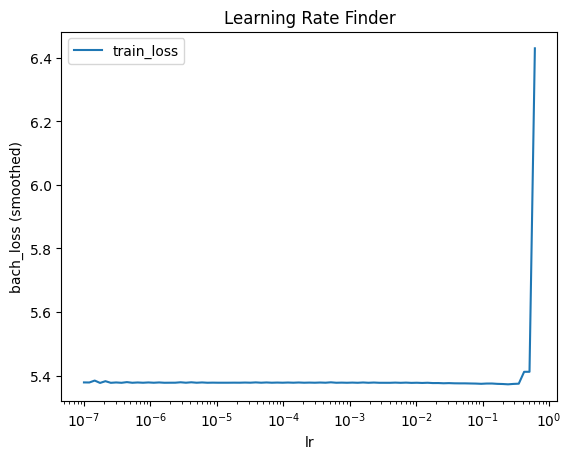

Melhor Learning Rate encontrado: 0.024201

--- Treinamento com Early Stopping ---
0:	[2s / 2s],		train_loss: 5.3773,	val_loss: 4.9740
1:	[3s / 5s],		train_loss: 5.3779,	val_loss: 4.9753
2:	[2s / 8s],		train_loss: 5.3733,	val_loss: 4.9690
3:	[3s / 12s],		train_loss: 5.3692,	val_loss: 4.9573
4:	[3s / 15s],		train_loss: 5.3650,	val_loss: 4.9524
5:	[3s / 18s],		train_loss: 5.3558,	val_loss: 4.9416
6:	[3s / 21s],		train_loss: 5.3440,	val_loss: 4.9383
7:	[3s / 24s],		train_loss: 5.3340,	val_loss: 4.9023
8:	[3s / 27s],		train_loss: 5.3251,	val_loss: 4.9218
9:	[3s / 31s],		train_loss: 5.3225,	val_loss: 4.9106
10:	[4s / 35s],		train_loss: 5.3305,	val_loss: 4.9101
11:	[2s / 38s],		train_loss: 5.3058,	val_loss: 4.9291
12:	[3s / 41s],		train_loss: 5.3036,	val_loss: 4.9500
13:	[3s / 44s],		train_loss: 5.3036,	val_loss: 4.9258
14:	[2s / 47s],		train_loss: 5.2835,	val_loss: 4.9029
15:	[3s / 50s],		train_loss: 5.2872,	val_loss: 4.8954
16:	[3s / 53s],		train_loss: 5.2904,	val_loss: 4.8925
17:	[2s / 56s

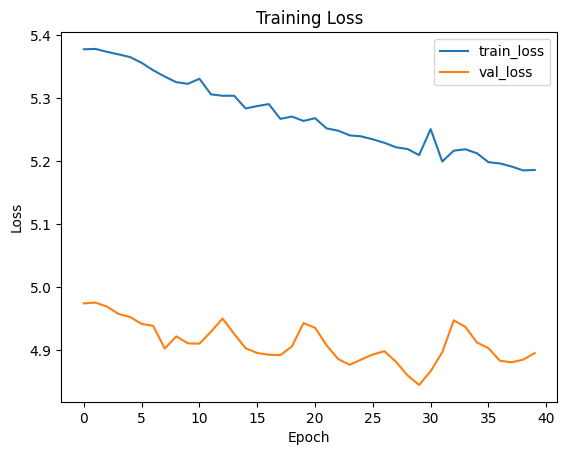


--- Avalia√ß√£o no conjunto de valida√ß√£o ---
Partial Log-Likelihood no conjunto de valida√ß√£o: -4.8450

--- C√°lculo da Baseline Hazard ---

--- Predi√ß√£o de Sobreviv√™ncia no conjunto de teste ---

--- Plot das Curvas de Sobreviv√™ncia (primeiros 5 pacientes do teste) ---


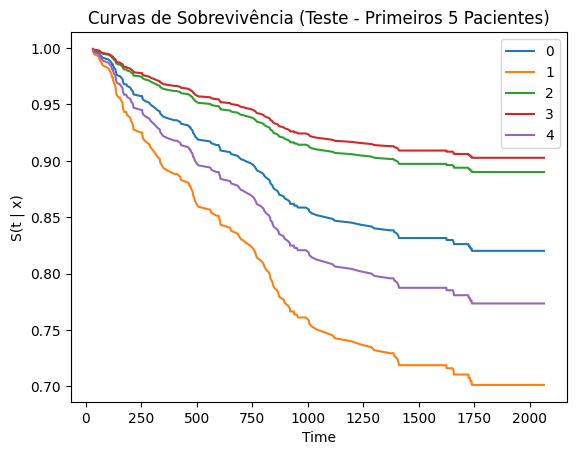

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import torchtuples as tt
from pycox.models import CoxPH
from pycox.evaluation import EvalSurv
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

# üîπ Fixar seeds para reprodutibilidade
torch.manual_seed(42)
np.random.seed(42)

# üîπ Definir o modelo convolucional como fun√ß√£o para flexibilidade
def create_cnn_model(out_channels1, out_channels2, kernel_size1, kernel_size2):
    return nn.Sequential(
        nn.Conv1d(in_channels=3, out_channels=out_channels1, kernel_size=kernel_size1, stride=2),
        nn.ReLU(),
        nn.MaxPool1d(kernel_size=2),
        nn.Conv1d(out_channels1, out_channels2, kernel_size=kernel_size2, stride=2),
        nn.ReLU(),
        nn.AdaptiveAvgPool1d(1),
        nn.Flatten(),  # Deixa a sa√≠da com shape (batch, out_channels2)
        nn.Linear(out_channels2, 1)
    )

# ----------------------- HIPERPAR√ÇMETROS ENCONTRADOS PELO OPTUNA (SUBSTITUA COM SEUS MELHORES VALORES) -----------------------
best_params = {
    'out_channels1': 25,  # Substitua pelo seu melhor valor
    'out_channels2': 48,  # Substitua pelo seu melhor valor
    'kernel_size1': 7,   # Substitua pelo seu melhor valor
    'kernel_size2': 5,   # Substitua pelo seu melhor valor
    'lr': 0.001        # Substitua pelo seu melhor valor
}

print("--- Aplicando os melhores hiperpar√¢metros ---")

# üî∏ Criar o modelo com os melhores hiperpar√¢metros
best_out_channels1 = best_params['out_channels1']
best_out_channels2 = best_params['out_channels2']
best_kernel_size1 = best_params['kernel_size1']
best_kernel_size2 = best_params['kernel_size2']
best_lr = best_params['lr']

best_net = create_cnn_model(best_out_channels1, best_out_channels2, best_kernel_size1, best_kernel_size2)
best_model = CoxPH(best_net, tt.optim.Adam)
best_model.optimizer.set_lr(best_lr)

# üî∏ Converter os dados para tensores (se ainda n√£o foram)
y_train_tensor = (torch.tensor(y_train[0]).float(), torch.tensor(y_train[1]).long())
y_val_tensor = (torch.tensor(y_val[0]).float(), torch.tensor(y_val[1]).long())
y_test_tensor = (torch.tensor(y_test[0]).float(), torch.tensor(y_test[1]).long())

val_tensor = (x_val, y_val_tensor)

# ‚è±Ô∏è Medir o tempo de treinamento
print("\n--- Treinamento com Learning Rate Finder ---")
start_time_lr_finder = time.time()
batch_size = 256
lrfinder = best_model.lr_finder(x_train, y_train_tensor, batch_size, tolerance=10)
end_time_lr_finder = time.time()
print(f"Tempo para Learning Rate Finder: {end_time_lr_finder - start_time_lr_finder:.2f} segundos")
_ = lrfinder.plot()
plt.title("Learning Rate Finder")
plt.show()

best_lr_found = lrfinder.get_best_lr()
print(f"Melhor Learning Rate encontrado: {best_lr_found:.6f}")
best_model.optimizer.set_lr(best_lr_found)

print("\n--- Treinamento com Early Stopping ---")
start_time_training = time.time()
epochs = 512
callbacks = [tt.callbacks.EarlyStopping()]
verbose = True

log = best_model.fit(x_train, y_train_tensor, batch_size, epochs, callbacks, verbose,
                    val_data=val_tensor, val_batch_size=batch_size)
end_time_training = time.time()
print(f"Tempo de treinamento: {end_time_training - start_time_training:.2f} segundos")

_ = log.plot()
plt.title("Training Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

print("\n--- Avalia√ß√£o no conjunto de valida√ß√£o ---")
partial_loglik_val = best_model.partial_log_likelihood(*val_tensor).mean().item()
print(f"Partial Log-Likelihood no conjunto de valida√ß√£o: {partial_loglik_val:.4f}")

print("\n--- C√°lculo da Baseline Hazard ---")
_ = best_model.compute_baseline_hazards()

print("\n--- Predi√ß√£o de Sobreviv√™ncia no conjunto de teste ---")
surv = best_model.predict_surv_df(x_test)

print("\n--- Plot das Curvas de Sobreviv√™ncia (primeiros 5 pacientes do teste) ---")
surv.iloc[:, :5].plot()
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')
plt.title("Curvas de Sobreviv√™ncia (Teste - Primeiros 5 Pacientes)")
plt.show()




- Para treinar o modelo, precisamos definir um otimizador. Voc√™ pode escolher qualquer torch.optimotimizador, mas aqui usamos um de , tt.optim pois ele tem algumas funcionalidades adicionais. Usamos o Adam otimizador, mas em vez de escolher uma taxa de aprendizado, usaremos o esquema proposto por [Smith em 2017](https://arxiv.org/pdf/1506.01186) para encontrar uma taxa de aprendizado adequada com model.lr_finder. Veja esta publica√ß√£o para uma explica√ß√£o.


np.float64(0.004534878508128605)

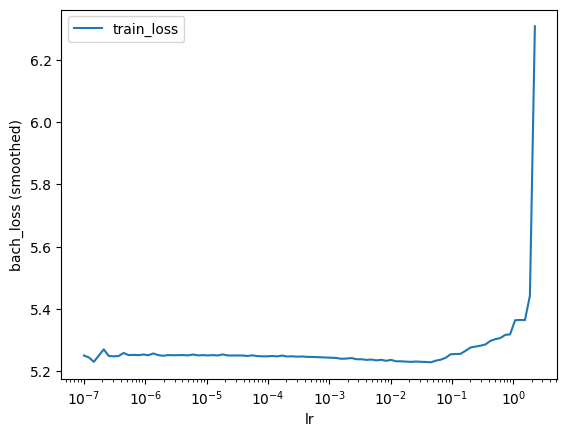

In [59]:

model = CoxPH(best_net, tt.optim.Adam)

#batch_size = 256
lrfinder = model.lr_finder(x_train, y_train_tensor, batch_size, tolerance=10)

_ = lrfinder.plot()

lrfinder.get_best_lr()


In [ ]:
# best_lr = lrfinder.get_best_lr()
# model.optimizer.set_lr(best_lr)

# model.optimizer.set_lr(0.01)


Muitas vezes, essa taxa de aprendizagem √© um pouco alta, ent√£o a definimos manualmente para 0,01

model.optimizer.set_lr(0.01)

Inclu√≠mos o EarlyStopping retorno de chamada para interromper o treinamento quando a perda de valida√ß√£o parar de melhorar. Ap√≥s o treinamento, esse retorno de chamada tamb√©m carregar√° o modelo com melhor desempenho em termos de perda de valida√ß√£o.


0:	[0s / 0s],		train_loss: 5.2958,	val_loss: 5.2355
1:	[0s / 1s],		train_loss: 5.2498,	val_loss: 5.6899
2:	[1s / 2s],		train_loss: 5.2433,	val_loss: 5.1991
3:	[0s / 3s],		train_loss: 5.2306,	val_loss: 5.2088
4:	[0s / 4s],		train_loss: 5.2175,	val_loss: 5.1659
5:	[0s / 4s],		train_loss: 5.2089,	val_loss: 5.1811
6:	[0s / 5s],		train_loss: 5.2159,	val_loss: 5.1743
7:	[0s / 6s],		train_loss: 5.1891,	val_loss: 5.1503
8:	[0s / 6s],		train_loss: 5.1969,	val_loss: 5.1468
9:	[1s / 8s],		train_loss: 5.1838,	val_loss: 5.1300
10:	[0s / 8s],		train_loss: 5.1766,	val_loss: 5.1084
11:	[0s / 9s],		train_loss: 5.1647,	val_loss: 5.1013
12:	[0s / 10s],		train_loss: 5.1524,	val_loss: 5.1568
13:	[0s / 10s],		train_loss: 5.1696,	val_loss: 5.0790
14:	[0s / 11s],		train_loss: 5.1481,	val_loss: 5.0887
15:	[0s / 11s],		train_loss: 5.1507,	val_loss: 5.1265
16:	[0s / 12s],		train_loss: 5.1310,	val_loss: 5.0629
17:	[0s / 13s],		train_loss: 5.1425,	val_loss: 5.0469
18:	[0s / 14s],		train_loss: 5.1427,	val_loss: 5.0

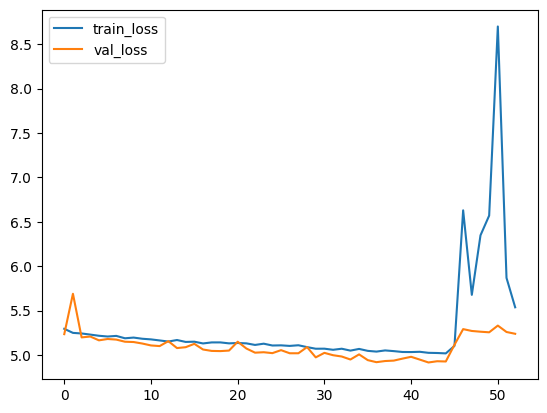

In [ ]:
%%time
epochs = 512
callbacks = [tt.callbacks.EarlyStopping()]
verbose = True


log = model.fit(x_train, y_train, batch_size, epochs, callbacks, verbose,
                val_data=val, val_batch_size=batch_size)

_ = log.plot()




Podemos obter o logaritmo parcial da verossimilhan√ßa
We can get the partial log-likelihood

In [60]:
model.partial_log_likelihood(*val_tensor).mean()


np.float32(-4.8450294)

## Previs√£o
- Para avalia√ß√£o, precisamos primeiro obter estimativas de sobreviv√™ncia para o conjunto de teste. Isso pode ser feito com model.predict_surv which retorna um array de estimativas de sobreviv√™ncia ou com model.predict_surv_df which retorna as estimativas de sobreviv√™ncia como um dataframe.

- Entretanto, como CoxCC√© semiparam√©trico, primeiro precisamos obter as estimativas de risco de base n√£o param√©tricas com compute_baseline_hazards.

- Observe que, para grandes conjuntos de dados, o sampleargumento pode ser usado para estimar o risco de base em um subconjunto.


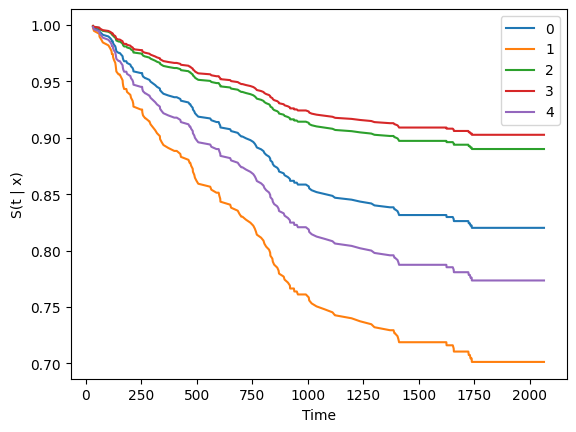

In [61]:

_ = model.compute_baseline_hazards()

surv = model.predict_surv_df(x_test)

surv.iloc[:, :5].plot()
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')




## Avalia√ß√£o
- Podemos usar a EvalSurvclasse para avaliar a concord√¢ncia, o escore de Brier e a verossimilhan√ßa logar√≠tmica binomial. A configura√ß√£o censor_surv='km' significa que estimamos a distribui√ß√£o de censura de Kaplan-Meier no conjunto de teste.


np.float64(0.35328716279078676)

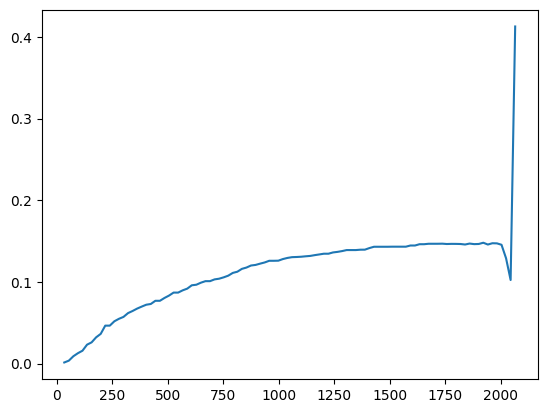

In [ ]:
from scipy.integrate import simps


# from scipy import integrate
# integrate = None  # ‚Üê quebra tudo

ev = EvalSurv(surv, durations_test, events_test, censor_surv='km')

# Calcular o C-index
ev.concordance_td()

time_grid = np.linspace(durations_test.min(), durations_test.max(), 100)
_ = ev.brier_score(time_grid).plot()

ev.integrated_brier_score(time_grid)

ev.integrated_nbll(time_grid)

 ### O C-index (ou Concordance Index) √© uma m√©trica muito usada em modelos de sobreviv√™ncia, como o CoxPH e o DeepSurv, e avalia a capacidade do modelo de ordenar corretamente os tempos de sobreviv√™ncia.

 Interpreta√ß√£o do C-index:
- C-index = 1.0 ‚Üí predi√ß√£o perfeita;

- C-index = 0.5 ‚Üí modelo aleat√≥rio (sem poder preditivo);

- C-index < 0.5 ‚Üí modelo est√° ordenando pior do que o acaso (isso √© raro e preocupante).
 

In [65]:
from pycox.evaluation import EvalSurv
import numpy as np
import matplotlib.pyplot as plt

# Calcular o C-index
#c_index = ev.concordance_td()
print(f'C-index: {study.best_value:.4f}')


# Integrated Brier Score
int_brier_score = ev.integrated_brier_score(time_grid)
print(f'Integrated Brier Score: {int_brier_score:.4f}')

# Integrated Negative Binomial Log-Likelihood
int_nbll = ev.integrated_nbll(time_grid)
print(f'Integrated NLL: {int_nbll:.4f}')


C-index: 0.6910


NameError: name 'ev' is not defined

 ## Implementa√ß√£o com Optuna
- Avalia 30 combina√ß√µes diferentes de par√¢metros.

- Usa concordance_td() como m√©trica a maximizar.

- Treina e avalia seu modelo automaticamente a cada tentativa.

- Ao final, mostra os melhores hiperpar√¢metros encontrados.

In [ ]:
import optuna
import torchtuples as tt
from pycox.models import CoxPH
from pycox.evaluation import EvalSurv
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler
import numpy as np
import torch

# üîπ Fixar seeds para reprodutibilidade
torch.manual_seed(42)
np.random.seed(42)

# üîπ Fun√ß√£o objetivo para Optuna
def objective(trial):
    # üî∏ Sugest√£o de hiperpar√¢metros
    num_layers = trial.suggest_int('num_layers', 1, 3)
    num_nodes = [trial.suggest_int(f'n_units_l{i}', 32, 128) for i in range(num_layers)]
    dropout = trial.suggest_float('dropout', 0.0, 0.5)
    batch_norm = trial.suggest_categorical('batch_norm', [True, False])
    #lr = trial.suggest_loguniform('lr', 1e-5, 1e-2)
    lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)


    # üî∏ Criar rede neural
    net = tt.practical.MLPVanilla(
        in_features=x_train.shape[1],
        num_nodes=num_nodes,
        out_features=1,
        batch_norm=batch_norm,
        dropout=dropout
    )

    # üî∏ Definir modelo CoxPH
    model = CoxPH(net, tt.optim.Adam)
    model.optimizer.set_lr(lr)

    # üî∏ Treinamento
    batch_size = 256
    epochs = 256
    callbacks = [tt.callbacks.EarlyStopping()]
    verbose = False

    model.fit(x_train, y_train, batch_size, epochs,
              callbacks, verbose, val_data=val)
    
    # ‚úÖ Calcular riscos basais antes de prever
    model.compute_baseline_hazards()
    
    # üî∏ Prever e avaliar na valida√ß√£o
    surv = model.predict_surv_df(x_val)
    ev = EvalSurv(surv, y_val[0], y_val[1], censor_surv='km')

    # üî∏ Retornar m√©trica a ser otimizada (C-index)
    return ev.concordance_td()

# üîπ Executar busca com Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# üîπ Mostrar melhores resultados
print('üéØ Melhores hiperpar√¢metros encontrados:')
best_params = study.best_params
print('Melhores par√¢metros:', best_params)


print(f'‚úÖ Melhor C-index na valida√ß√£o: {study.best_value:.4f}')



[I 2025-04-25 16:09:57,063] A new study created in memory with name: no-name-9d16ae2f-5257-4a8e-988c-9d8d02fd2b93
[I 2025-04-25 16:11:08,029] Trial 0 finished with value: 0.659484379677404 and parameters: {'num_layers': 1, 'n_units_l0': 57, 'dropout': 0.03598842172867156, 'batch_norm': True, 'lr': 5.372368081690521e-05}. Best is trial 0 with value: 0.659484379677404.
[I 2025-04-25 16:12:46,472] Trial 1 finished with value: 0.6562752490347349 and parameters: {'num_layers': 1, 'n_units_l0': 44, 'dropout': 0.3215976576268963, 'batch_norm': False, 'lr': 0.000285151838077551}. Best is trial 0 with value: 0.659484379677404.
[I 2025-04-25 16:13:36,733] Trial 2 finished with value: 0.6972143230483067 and parameters: {'num_layers': 1, 'n_units_l0': 93, 'dropout': 0.14033534236021017, 'batch_norm': False, 'lr': 0.002217933610556795}. Best is trial 2 with value: 0.6972143230483067.
[I 2025-04-25 16:15:09,684] Trial 3 finished with value: 0.8760771410402054 and parameters: {'num_layers': 3, 'n_uni

üéØ Melhores hiperpar√¢metros encontrados:
Melhores par√¢metros: {'num_layers': 3, 'n_units_l0': 84, 'n_units_l1': 84, 'n_units_l2': 110, 'dropout': 0.08679803655445323, 'batch_norm': False, 'lr': 0.0019838972351298866}
‚úÖ Melhor C-index na valida√ß√£o: 0.8955


In [ ]:
melhores_parametros = study.best_trial.params
print(melhores_parametros)




{'num_layers': 3, 'n_units_l0': 84, 'n_units_l1': 84, 'n_units_l2': 110, 'dropout': 0.08679803655445323, 'batch_norm': False, 'lr': 0.0019838972351298866}


In [ ]:
melhores_parametros

{'num_layers': 3,
 'n_units_l0': 84,
 'n_units_l1': 84,
 'n_units_l2': 110,
 'dropout': 0.08679803655445323,
 'batch_norm': False,
 'lr': 0.0019838972351298866}

0:	[0s / 0s],		train_loss: 6.2239,	val_loss: 5.9259
1:	[0s / 0s],		train_loss: 5.5282,	val_loss: 5.3159
2:	[0s / 1s],		train_loss: 5.3143,	val_loss: 5.2762
3:	[0s / 1s],		train_loss: 5.3041,	val_loss: 5.2606
4:	[0s / 2s],		train_loss: 5.3029,	val_loss: 5.2539
5:	[0s / 2s],		train_loss: 5.2776,	val_loss: 5.2496
6:	[0s / 2s],		train_loss: 5.2760,	val_loss: 5.2462
7:	[0s / 3s],		train_loss: 5.2817,	val_loss: 5.2430
8:	[0s / 3s],		train_loss: 5.2748,	val_loss: 5.2408
9:	[0s / 4s],		train_loss: 5.2823,	val_loss: 5.2384
10:	[0s / 4s],		train_loss: 5.2592,	val_loss: 5.2357
11:	[0s / 5s],		train_loss: 5.2583,	val_loss: 5.2330
12:	[0s / 5s],		train_loss: 5.2568,	val_loss: 5.2310
13:	[0s / 5s],		train_loss: 5.2494,	val_loss: 5.2289
14:	[0s / 6s],		train_loss: 5.2511,	val_loss: 5.2263
15:	[0s / 6s],		train_loss: 5.2492,	val_loss: 5.2243
16:	[0s / 7s],		train_loss: 5.2465,	val_loss: 5.2225
17:	[0s / 7s],		train_loss: 5.2440,	val_loss: 5.2209
18:	[0s / 8s],		train_loss: 5.2407,	val_loss: 5.2186
19:

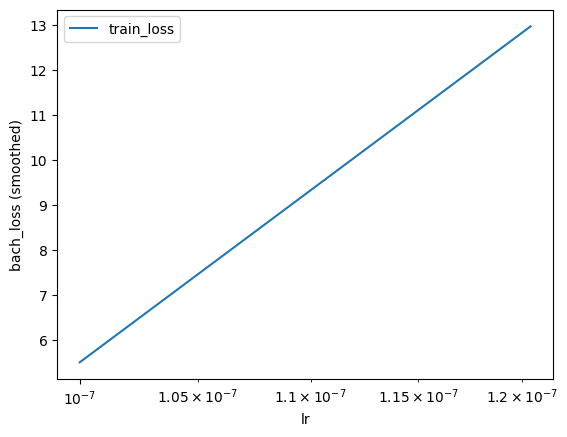

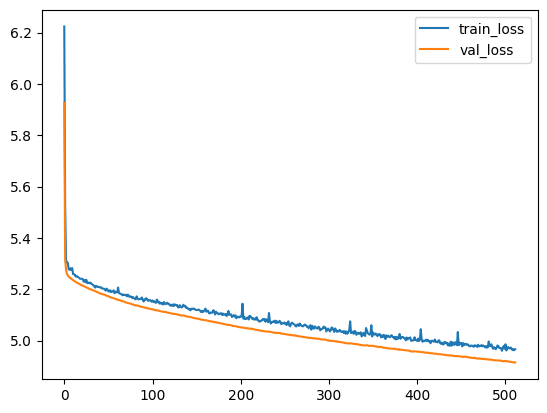

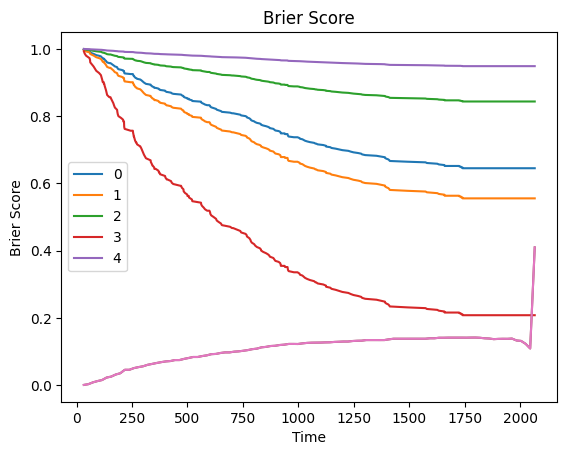

Integrated Brier Score: 0.1083
Integrated NLL: 0.3493


In [ ]:

in_features = x_train.shape[1]  # n√∫mero de entradas (features)
num_nodes = num_nodes = [
    melhores_parametros['n_units_l0'],
    melhores_parametros['n_units_l1']
    #melhores_parametros['n_units_l2']
]
        # aumentamos o n√∫mero de neur√¥nios e adicionamos uma camada
out_features = 1
batch_norm = melhores_parametros['batch_norm']               # mant√©m a normaliza√ß√£o em lote
dropout = melhores_parametros['dropout']                # aumentamos um pouco o dropout
output_bias = False

net = tt.practical.MLPVanilla(
    in_features=in_features,
    num_nodes=num_nodes,
    out_features=out_features,
    batch_norm=batch_norm,
    dropout=dropout,
    output_bias=output_bias
)


model = CoxPH(net, tt.optim.Adam)

batch_size = 256
lrfinder = model.lr_finder(x_train, y_train, batch_size, tolerance=10)
_ = lrfinder.plot()

epochs = 512
callbacks = [tt.callbacks.EarlyStopping()]
verbose = True


log = model.fit(x_train, y_train, batch_size, epochs, callbacks, verbose,
                val_data=val, val_batch_size=batch_size)

_ = log.plot()

model.partial_log_likelihood(*val).mean()


_ = model.compute_baseline_hazards()

surv = model.predict_surv_df(x_test)

surv.iloc[:, :5].plot()
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')

from scipy.integrate import simps


# from scipy import integrate
# integrate = None  # ‚Üê quebra tudo

ev = EvalSurv(surv, durations_test, events_test, censor_surv='km')

# Calcular o C-index
ev.concordance_td()

time_grid = np.linspace(durations_test.min(), durations_test.max(), 100)
_ = ev.brier_score(time_grid).plot()

ev.integrated_brier_score(time_grid)

ev.integrated_nbll(time_grid)



from pycox.evaluation import EvalSurv
import numpy as np
import matplotlib.pyplot as plt

# Calcular o C-index
c_index = ev.concordance_td()
print(f'C-index: {c_index:.4f}')

# Gr√°fico da Brier Score
time_grid = np.linspace(durations_test.min(), durations_test.max(), 100)
brier_score = ev.brier_score(time_grid)
_ = brier_score.plot()
plt.title('Brier Score')
plt.xlabel('Time')
plt.ylabel('Brier Score')
plt.show()

# Integrated Brier Score
int_brier_score = ev.integrated_brier_score(time_grid)
print(f'Integrated Brier Score: {int_brier_score:.4f}')

# Integrated Negative Binomial Log-Likelihood
int_nbll = ev.integrated_nbll(time_grid)
print(f'Integrated NLL: {int_nbll:.4f}')


In [ ]:
# Supondo que durations_test contenha os tempos de falha do conjunto de teste
time_grid = np.linspace(durations_test.min(), durations_test.max(), 100)
# Calcular as m√©tricas de avalia√ß√£o
ev_test = EvalSurv(surv, durations_test, events_test, censor_surv='km')

# C√°lculo do C-index
print(f'C-index teste: {ev_test.concordance_td():.4f}')

# C√°lculo do IBS (integrated Brier score), agora com a grade de tempo
print(f'IBS teste: {ev_test.integrated_brier_score(time_grid):.4f}')

# C√°lculo do NLL
print(f'NLL teste: {ev_test.integrated_nbll(time_grid):.4f}')


C-index teste: 0.7540
IBS teste: 0.1083
NLL teste: 0.3493


Testando novo paciente com os seguintes dados depois do modelo estiver pronto

In [ ]:
novo_paciente = pd.DataFrame([{
    'HRV_MeanNN': 750.0,
    'QRS_Duration': 90.0,
    'QT_Interval': 400.0,
    'Idade': 65,
    'Sex': 1
}])


In [ ]:
x_novo = x_mapper.transform(novo_paciente).astype('float32')


In [ ]:
# Prever a fun√ß√£o de sobreviv√™ncia para o novo paciente
surv_novo = model.predict_surv_df(x_novo)

In [ ]:
risco_novo = 1 - surv_novo  # 1 - fun√ß√£o de sobreviv√™ncia

Para interpretar o gr√°fico da fun√ß√£o de sobreviv√™ncia, √© importante entender que ela mostra a probabilidade de um evento (como falha ou morte) n√£o ocorrer at√© um determinado tempo. Em outras palavras, ela descreve a probabilidade de um paciente sobreviver ap√≥s um certo per√≠odo de tempo.

No gr√°fico da fun√ß√£o de sobreviv√™ncia, o eixo X representa o tempo e o eixo Y representa a probabilidade de sobreviv√™ncia (ou seja, a probabilidade de o evento de falha n√£o ocorrer at√© aquele momento).

Interpreta√ß√£o do gr√°fico da fun√ß√£o de sobreviv√™ncia:
Decl√≠nio da probabilidade: Se a curva estiver decaindo ao longo do tempo, isso indica que, √† medida que o tempo passa, a probabilidade de o paciente "sobreviver" (ou seja, o evento de falha n√£o ocorrer) diminui. Em outras palavras, a chance do evento acontecer aumenta com o tempo.

Plana (ou muito pouco declinante): Se a curva for mais plana, isso significa que a probabilidade de sobreviv√™ncia n√£o est√° diminuindo muito ao longo do tempo, o que pode indicar que o paciente tem uma chance maior de "sobreviver" ou evitar o evento de falha por um longo per√≠odo.

Valor no eixo Y: O valor de 1 no eixo Y representa uma probabilidade de sobreviv√™ncia de 100% (ou seja, o evento de falha ainda n√£o ocorreu no momento considerado). √Ä medida que a fun√ß√£o de sobreviv√™ncia decai, o valor de Y diminui, o que indica uma maior chance do evento ocorrer.

Pontos de queda: Se o gr√°fico apresenta quedas abruptas, isso pode indicar que o evento de falha ocorre rapidamente em alguns pontos do tempo. A forma e a rapidez da queda fornecem insights sobre a distribui√ß√£o temporal dos eventos de falha.

Exemplo de como interpretar:
Se no gr√°fico voc√™ v√™ que aos 30 dias a probabilidade de sobreviv√™ncia √© 0.8, isso significa que, com base nos dados, h√° 80% de chance de o paciente sobreviver at√© 30 dias sem o evento ocorrer.

Se a curva atinge 0 no final, isso significa que, ao longo do tempo (nos √∫ltimos pontos), a probabilidade de sobreviv√™ncia se aproxima de 0%, ou seja, o evento ocorreu para todos os indiv√≠duos no conjunto de dados.

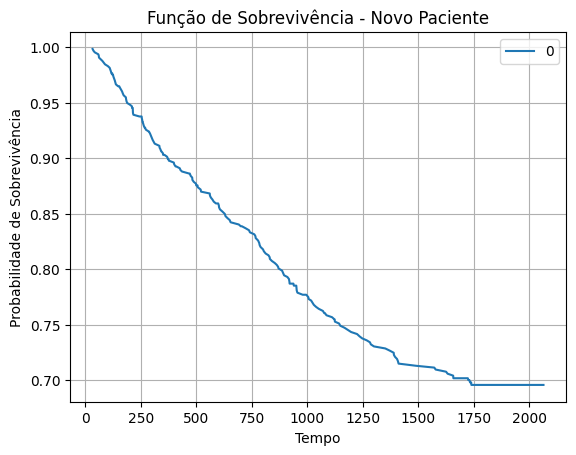

In [ ]:
import matplotlib.pyplot as plt

surv_novo.plot()
plt.title('Fun√ß√£o de Sobreviv√™ncia - Novo Paciente')
plt.xlabel('Tempo')
plt.ylabel('Probabilidade de Sobreviv√™ncia')
plt.grid(True)
plt.show()


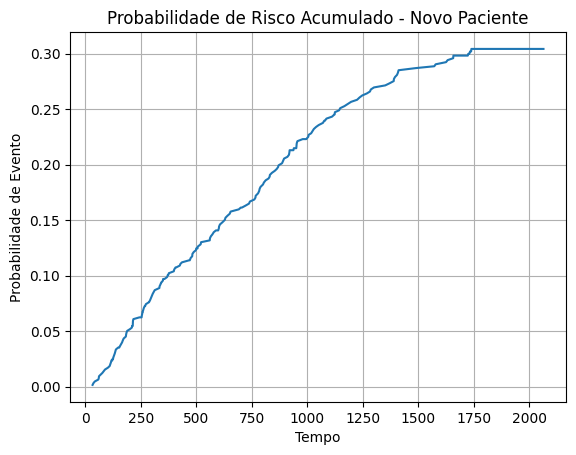

In [ ]:
import matplotlib.pyplot as plt

# Plotando a linha de risco acumulado para o paciente
risco_novo.plot(legend=False)  # Remove a legenda, se necess√°rio
plt.title('Probabilidade de Risco Acumulado - Novo Paciente')
plt.xlabel('Tempo')
plt.ylabel('Probabilidade de Evento')
plt.grid(True)
plt.show()


## Treinando o modelo Redes CNN (convolutional neural network)

In [ ]:
import torch
import torch.nn as nn
import torchtuples as tt
from pycox.models import CoxPH
from pycox.evaluation import EvalSurv

# Modelo CNN para sinais ECG com 3 deriva√ß√µes (X, Y, Z)
class ECG_CoxNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.feature_extractor = nn.Sequential(
            nn.Conv1d(in_channels=3, out_channels=16, kernel_size=7, stride=2),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(16, 32, kernel_size=5, stride=2),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1),  # sa√≠da: (batch, 32, 1)
        )
        self.output = nn.Linear(32, 1)  # f(x)

    def forward(self, x):
        x = self.feature_extractor(x)    # (batch, 32, 1)
        x = x.view(x.size(0), -1)        # (batch, 32)
        return self.output(x)            # (batch, 1)

if __name__ == "__main__":
    # ------- Simula√ß√£o de um dataset -------
    batch_size = 500
    sinal_len = 3000  # ex: 10 s de ECG a 300 Hz

    # Sinais com 3 canais (X, Y, Z)
    x_train = torch.randn(batch_size, 3, sinal_len)
    # Tempo at√© o evento (unidade arbitr√°ria)
    durations = torch.randint(low=10, high=1000, size=(batch_size,))
    # Evento: 1=ocorreu, 0=censurado
    events = torch.randint(low=0, high=2, size=(batch_size,))

    # ------- Inicializa modelo e otimizador -------
    net = ECG_CoxNet()
    model = CoxPH(net, tt.optim.Adam)

    # ------- Treinamento -------
    model.fit(x_train, (durations, events),
              batch_size=64, epochs=10, verbose=True)

    # ------- Avalia√ß√£o -------
    model.compute_baseline_hazards()
    surv = model.predict_surv_df(x_train)  
    ev = EvalSurv(surv,
                  durations.numpy(),
                  events.numpy(),
                  censor_surv='km')
    print("C-index:", ev.concordance_td())


0:	[0s / 0s],		train_loss: 3.2703
1:	[0s / 0s],		train_loss: 3.2580
2:	[0s / 1s],		train_loss: 3.2593
3:	[0s / 1s],		train_loss: 3.2671
4:	[0s / 1s],		train_loss: 3.2678
5:	[0s / 1s],		train_loss: 3.2579
6:	[0s / 2s],		train_loss: 3.2467
7:	[0s / 2s],		train_loss: 3.2494
8:	[0s / 2s],		train_loss: 3.2573
9:	[0s / 2s],		train_loss: 3.2519
C-index: 0.6246377668697144
